In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train ), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9665 - loss: 0.1093
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9779 - loss: 0.0697
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9847 - loss: 0.0485


In [15]:
model.save('handwritten.keras')

In [16]:
model = tf.keras.models.load_model('handwritten.keras')

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9681 - loss: 0.1151


In [32]:
print(loss)
print(accuracy)

0.09937161952257156
0.9721999764442444


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This number is a 1


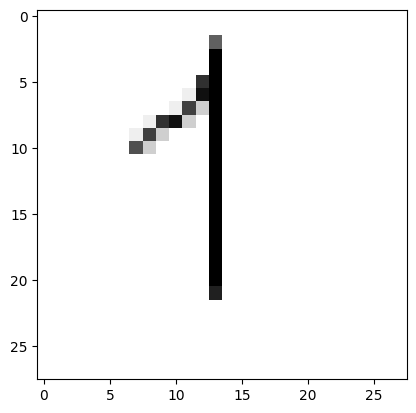

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This number is a 2


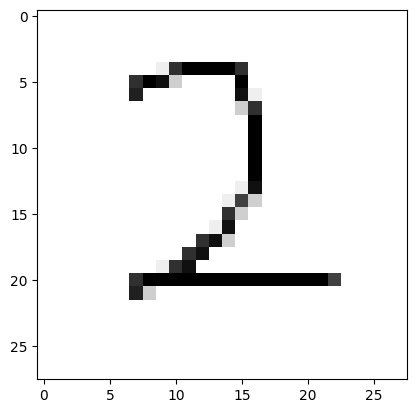

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This number is a 3


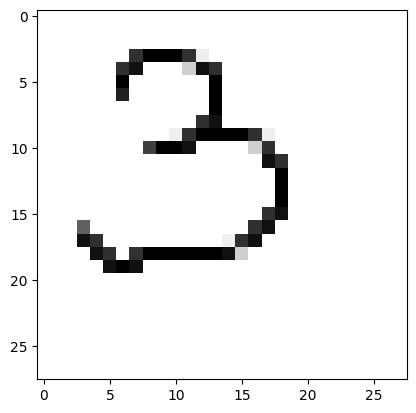

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
This number is a 6


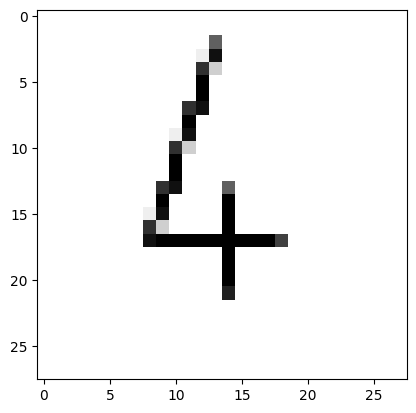

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This number is a 2


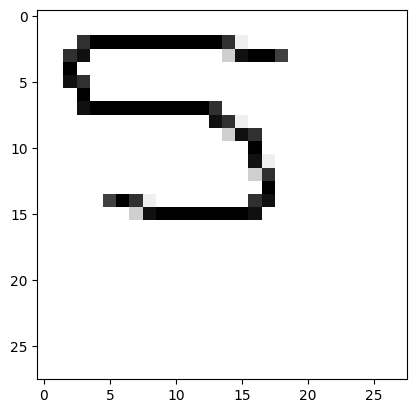

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This number is a 6


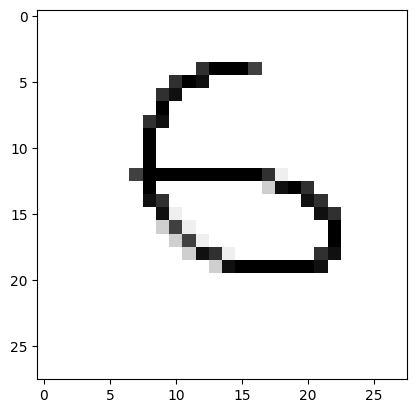

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This number is a 1


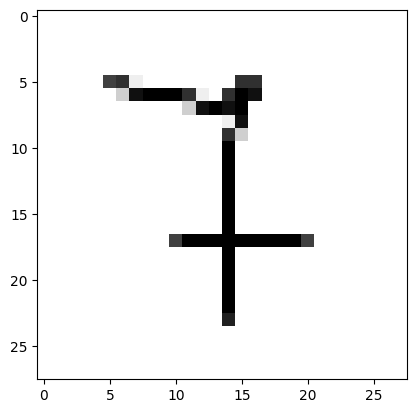

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
This number is a 3


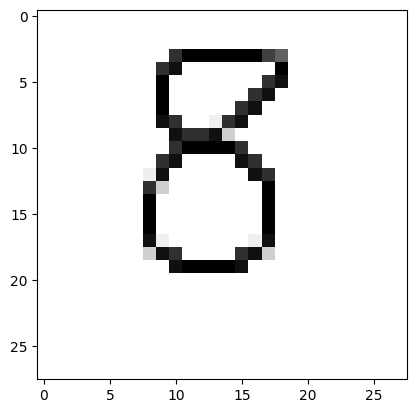

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This number is a 2


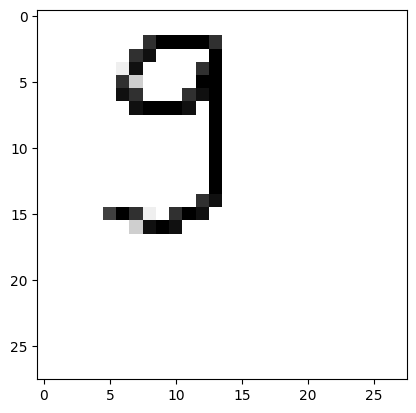

In [42]:
image_number=1
while os.path.isfile(f"digits/digit{image_number}.png"):
  try:
    img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This number is a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("error")
  finally:
    image_number += 1